In [108]:
#Importing required Libraries
import pandas as pd 
import numpy as np 
import json
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import seaborn as sns
pd.set_option("display.max_columns", None)




# DATA GATHERING

In [109]:
# Read csv files into a pandas dataframe
#Twitter archive data
tw_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
#Image predictions data
img_pre_df = pd.read_csv("image_predictions.tsv", sep = "\t")

In [110]:
# extract data from Twitter API data (tweet_json.txt), convert to data frame with tweets id , retweet_count and favorite_count
tweets_list = []
with open('tweet-json.txt' , 'r') as file:
    for lines in file:
        tweet = json.loads(lines)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        tweets_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
tweets_list
tweets_df = pd.DataFrame(tweets_list)


In [111]:
def ShowDetails(data_set):
    #Dataset Features Summary
    print(f'[Dataset Features Summary]\n▸Your Dataset has {data_set.shape[0]} Rows and {data_set.shape[1]} Columns')
    #Any duplicated rows ?
    print(f'▸Number of Duplicates Rows in Dataset = {sum(data_set.duplicated())}')
    # Total number of missing values
    sum_of_null_values = data_set.isnull().sum().sum()
    # Total missing values for each feature
    if sum_of_null_values > 0:
        print("▸Columns With Missing Values")
        for columns in data_set:
            if data_set[columns].isnull().any():
                print('[{0}] has: {1} null values , Percentage = {2:.2f}% '
                .format(columns, data_set[columns].isnull().sum(), 
                      100 * data_set[columns].isnull().sum() / len(data_set[columns])))
    else:
        print("▸Dataset hasn't Misssing Values")
    print("-"*40)
    # Features datatype , unique values and value counts
    for columns in data_set:
        num_of_unique = data_set[columns].nunique()
        print(f"▸Column's Name:{columns}\n▸Column's Datatype:{data_set.dtypes[columns]}\n▸Number of Unique Values:{num_of_unique}")
        if num_of_unique <= 10 :
             print("▸Unique Values :\n" , data_set[columns].unique()[:10])
        print(f"▸Column's Values Count : \n{data_set[columns].value_counts()}\n ----------")
        print("-"*40)     

# DATA ASSESSMENT AND CLEANING

In [112]:
#display samples of Twitter archive data
tw_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1578,687317306314240000,NaN,NaN,2016-01-13 16:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrone. He's a leaf wizard. Self-motiv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13,10,Eli,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026...,11,10,a,None,None,None,None
904,758355060040593408,NaN,NaN,2016-07-27 17:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758355060...,11,10,Corey,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants to say hello. 11/10 wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688916208...,11,10,None,None,None,pupper,None
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
623,796031486298386433,NaN,NaN,2016-11-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's here to make your day bet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796031486...,13,10,Daisy,None,None,None,None


In [113]:
#Assessing Twitter archive data
ShowDetails(tw_archive_df)

[Dataset Features Summary]
▸Your Dataset has 2356 Rows and 17 Columns
▸Number of Duplicates Rows in Dataset = 0
▸Columns With Missing Values
[in_reply_to_status_id] has: 2278 null values , Percentage = 96.69% 
[in_reply_to_user_id] has: 2278 null values , Percentage = 96.69% 
[retweeted_status_id] has: 2175 null values , Percentage = 92.32% 
[retweeted_status_user_id] has: 2175 null values , Percentage = 92.32% 
[retweeted_status_timestamp] has: 2175 null values , Percentage = 92.32% 
[expanded_urls] has: 59 null values , Percentage = 2.50% 
----------------------------------------
▸Column's Name:tweet_id
▸Column's Datatype:int64
▸Number of Unique Values:2356
▸Column's Values Count : 
700151421916807169    1
674764817387900928    1
794926597468000259    1
701570477911896070    1
715220193576927233    1
697990423684476929    1
748307329658011649    1
675372240448454658    1
886054160059072513    1
670385711116361728    1
767500508068192258    1
837482249356513284    1
689977555533848577

#### Assessing Twitter archive data results
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id and retweeted_status_timestamp have high percentage of missing values so we will drop them 
2. tweet_id is stored as int , it should stored as object
3. timestamp is stored as object , it should stored as datetime
4. extract source as text and stored it as catogray
6. convert Nona and a values in name to nan
7. extract dogs stage from text, then drop doggo, floofer, pupper and puppo columns
8. the fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.



### Code

In [114]:
# Make copy of original data
cleaned_archive = tw_archive_df.copy()

In [115]:
#Extract text from source column
cleaned_archive['source'] = [BeautifulSoup(X).getText() for X in cleaned_archive['source']]
#replace 'None' and 'a' to nan
cleaned_archive['name'] = cleaned_archive['name'].replace({'None': 'Unknown' , 'a' : 'Unknown'})
cleaned_archive['name'] = cleaned_archive['name'].str.lower()


In [116]:
#change timestamp datatype to pandas datetime and split to data and time columns
cleaned_archive['timestamp'] = pd.to_datetime(cleaned_archive['timestamp'])
#Remove the time zone from the 'timestamp' column
cleaned_archive['timestamp'] = cleaned_archive['timestamp'].dt.tz_localize(None)

In [117]:
#Extract dogs stage names from text
cleaned_archive['dogs_stage'] = cleaned_archive['text'].str.extract('(puppo|pupper|floofer|doggo|Puppo|Pupper|Floofer|Doggo)')
cleaned_archive['dogs_stage'] = cleaned_archive['dogs_stage'].str.lower()

In [118]:
#change tweet_id datatype to object
cleaned_archive['tweet_id'] = cleaned_archive['tweet_id'].astype("str")
#change 'source' and 'dogs_stage' to category
cleaned_archive[['source', 'dogs_stage']] = cleaned_archive[['source', 'dogs_stage']].astype('category')

In [119]:
#drop columns with too many missing values and not useful in analysis 
cleaned_archive = cleaned_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls',
                                             'doggo', 'floofer', 'pupper', 'puppo'] , axis=1)

### Test

In [120]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   category      
 3   text                2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   name                2356 non-null   object        
 7   dogs_stage          418 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(2), object(3)
memory usage: 115.6+ KB


In [121]:
#display samples of Image predictions data
img_pre_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True


In [122]:
#Assessing Image predictions data
ShowDetails(img_pre_df)

[Dataset Features Summary]
▸Your Dataset has 2075 Rows and 12 Columns
▸Number of Duplicates Rows in Dataset = 0
▸Dataset hasn't Misssing Values
----------------------------------------
▸Column's Name:tweet_id
▸Column's Datatype:int64
▸Number of Unique Values:2075
▸Column's Values Count : 
700151421916807169    1
740373189193256964    1
836989968035819520    1
816336735214911488    1
688828561667567616    1
667119796878725120    1
860563773140209665    1
692417313023332352    1
676496375194980353    1
760252756032651264    1
672538107540070400    1
685169283572338688    1
669371483794317312    1
761976711479193600    1
675898130735476737    1
708109389455101952    1
843604394117681152    1
743980027717509120    1
670338931251150849    1
713175907180089344    1
782722598790725632    1
816829038950027264    1
815966073409433600    1
832769181346996225    1
779834332596887552    1
666345417576210432    1
793500921481273345    1
748307329658011649    1
715220193576927233    1
80441376034562

In [123]:
#describe method for numircal values
img_pre_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessing Image predictions data results
1. tweet_id is stored as int , it should stored as object
2. img_num is stored as int , it should stored as category
3. p1_cof always has the highest confidence percentage than p2_cof and p3_cof
4. creat two columns 'confidence' and 'dog_breed' with confidence percentage refer to dog breed


## Code

In [124]:
# Make copy of original data
cleaned_imgpre = img_pre_df.copy()


In [125]:
breed = []
confidence= []
for index, rows in cleaned_imgpre.iterrows():
    if rows['p1_dog'] == True :
        breed.append(rows['p1'])
        confidence.append(int(rows['p1_conf']*100))
    else :
        if rows['p2_dog'] == True:
            breed.append(rows['p2'])
            confidence.append(int(rows['p2_conf']*100))
        else :
            if rows['p3_dog'] == True:
                breed.append(rows['p3'])
                confidence.append(int(rows['p3_conf']*100))
            else :
                breed.append(np.nan)
                confidence.append(np.nan)
                
cleaned_imgpre['confidence %'] = confidence
cleaned_imgpre['confidence %'] = cleaned_imgpre['confidence %'].astype('Int64')
cleaned_imgpre['dog_breed'] = breed
cleaned_imgpre['dog_breed'] = cleaned_imgpre['dog_breed'].str.lower()

In [126]:
#drop columns with too many missing values and not useful in analysis 
cleaned_imgpre = cleaned_imgpre.drop(columns=['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'] , axis=1)
#change tweet_id datatype to object
cleaned_imgpre['tweet_id'] = cleaned_imgpre['tweet_id'].astype("str")

### Test

In [127]:
cleaned_imgpre.head()

,tweet_id,jpg_url,img_num,confidence %,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,46,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,50,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,59,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,40,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,56,miniature_pinscher


In [128]:
cleaned_imgpre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2075 non-null   object
 1   jpg_url       2075 non-null   object
 2   img_num       2075 non-null   int64 
 3   confidence %  1751 non-null   Int64 
 4   dog_breed     1751 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 83.2+ KB


In [129]:
#descriptive statistics for dataset
cleaned_imgpre.describe()

,img_num,confidence %
count,2075.000000,1751.000000
mean,1.203855,54.390634
std,0.561875,29.862473
min,1.000000,0.000000
25%,1.000000,30.000000
50%,1.000000,54.000000
75%,1.000000,82.000000
max,4.000000,99.000000


In [130]:
#drop rows with missing values
#cleaned_imgpre = cleaned_imgpre.dropna()
#check changes
#cleaned_imgpre.info()

In [131]:
#display samples of Twitter API data
tweets_df.sample(10)

,tweet_id,retweet_count,favorite_count
1024,746131877086527488,2511,7565
1105,734776360183431168,608,2742
2186,668975677807423489,641,1386
1192,717428917016076293,510,1748
2138,670003130994700288,100,352
134,866450705531457537,32883,106827
87,875097192612077568,6342,27997
549,804738756058218496,4480,15326
1520,690649993829576704,325,1435
495,813157409116065792,2557,8588


In [132]:
#Assessing Twitter API data
ShowDetails(tweets_df)

[Dataset Features Summary]
▸Your Dataset has 2354 Rows and 3 Columns
▸Number of Duplicates Rows in Dataset = 0
▸Dataset hasn't Misssing Values
----------------------------------------
▸Column's Name:tweet_id
▸Column's Datatype:int64
▸Number of Unique Values:2354
▸Column's Values Count : 
700151421916807169    1
713175907180089344    1
754482103782404096    1
699446877801091073    1
794926597468000259    1
701570477911896070    1
715220193576927233    1
697990423684476929    1
748307329658011649    1
675372240448454658    1
886054160059072513    1
670385711116361728    1
767500508068192258    1
837482249356513284    1
689977555533848577    1
711743778164514816    1
816829038950027264    1
740373189193256964    1
672975131468300288    1
857062103051644929    1
775733305207554048    1
838150277551247360    1
701545186879471618    1
678800283649069056    1
757741869644341248    1
825026590719483904    1
834209720923721728    1
681193455364796417    1
693155686491000832    1
879492040517615

In [133]:
tweets_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Assessing Twitter API data data results 
1. tweet_id is stored as int , it should stored as object
2. favorite_count has zero values

## Code

In [134]:
def CleantweetData(data_set):
    test2 = data_set.copy()
    #change tweet_id datatype to object
    test2['tweet_id'] = test2['tweet_id'].astype("str")
    
    return test2
cleaned_tweet = CleantweetData(tweets_df)

## Test 

In [135]:
cleaned_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Code


In [136]:
#merge 3 datasets to twitter_archive_master
master = pd.merge(clean_archive, clean_tweet,  on='tweet_id')
master = pd.merge(master, cleaned_imgpre , on = 'tweet_id')
master.to_csv('twitter_archive_master.csv')
master.head()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,confidence %,dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,<NA>,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,32,chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,71,chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,16,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,55,basset


### Test

In [137]:
#check changes
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2073 non-null   object        
 1   timestamp           2073 non-null   datetime64[ns]
 2   source              2073 non-null   category      
 3   text                2073 non-null   object        
 4   rating_numerator    2073 non-null   int64         
 5   rating_denominator  2073 non-null   int64         
 6   name                2073 non-null   object        
 7   dogs_stage          353 non-null    category      
 8   retweet_count       2073 non-null   int64         
 9   favorite_count      2073 non-null   int64         
 10  jpg_url             2073 non-null   object        
 11  img_num             2073 non-null   int64         
 12  confidence %        1750 non-null   Int64         
 13  dog_breed           1750 non-null   object      

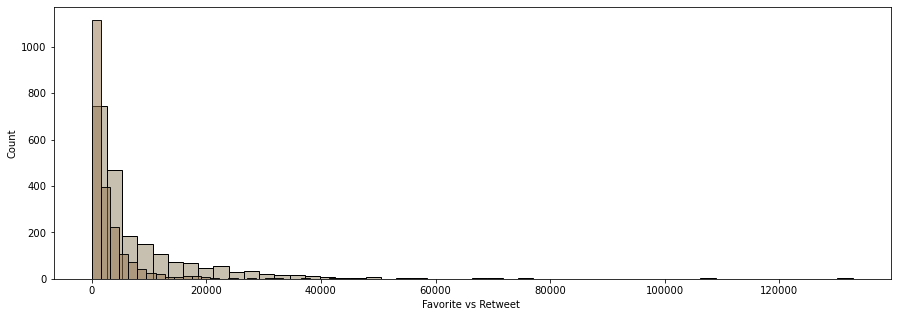

In [138]:
#Favorite vs Retweet count 
fig, axes = plt.subplots(figsize=(15,5))
sns.histplot(master.favorite_count , alpha= 0.5,color= '#918363', bins =50 );
sns.histplot(master.retweet_count , alpha =0.5 ,color='#94744B', bins = 50 );
plt.xlabel("Favorite vs Retweet ",fontsize = 10);



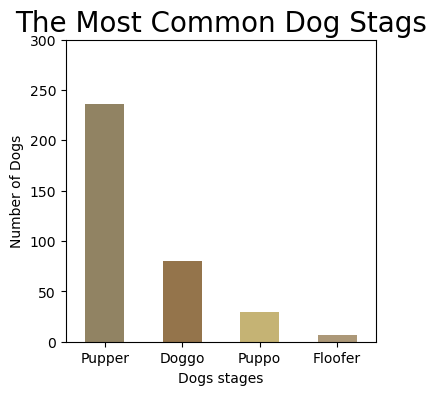

In [139]:
colors = ['#918363', '#94744B', '#C5B374', '#AC9878']
plt.figure(figsize = (4,4), dpi = 100)

dogs = master["dogs_stage"].value_counts()
dogs.plot(kind="bar"  , color = colors );
plt.title('The Most Common Dog Stags' ,fontsize = 20);
plt.xlabel("Dogs stages",fontsize = 10);
plt.xticks([0, 1, 2 , 3], ['Pupper', 'Doggo', 'Puppo', 'Floofer'],rotation=0)
plt.ylabel("Number of Dogs");
plt.ylim(0,300)

plt.show();

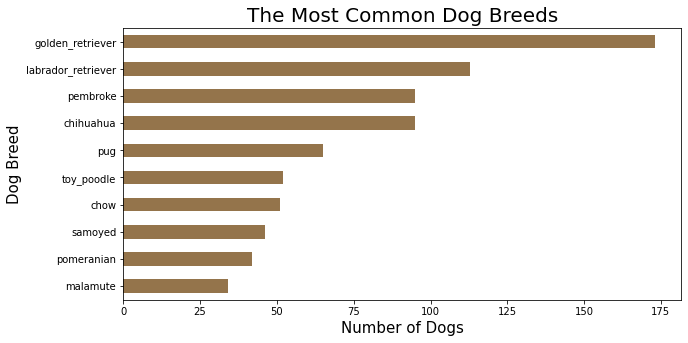

In [140]:
dog = master["dog_breed"].value_counts()[:10]
dog.sort_values(ascending=True).plot(kind="barh"  , color = '#94744B' ,figsize = (10,5));
plt.title('The Most Common Dog Breeds' ,fontsize = 20);
plt.ylabel("Dog Breed",fontsize = 15);
plt.xticks(rotation=0)
plt.xlabel("Number of Dogs",fontsize = 15);